In [53]:
import pandas as pd

In [54]:
spotify_df = pd.read_csv('spotify_data.csv')
billboard_df = pd.read_csv('billboard_hot_stuff.csv')

In [55]:
# Standardize song names and artist names
spotify_df['name'] = spotify_df['name'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True)
spotify_df['artists'] = spotify_df['artists'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True)
billboard_df['Song'] = billboard_df['Song'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True)
billboard_df['Performer'] = billboard_df['Performer'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True)


In [56]:
spotify_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,carl woitschach,0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,singende bataillone 1 teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,robert schumann vladimir horowitz,0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,fantasiestcke op 111 pi tosto lento,0,1928,0.0462,83.972,0.0767,1928
2,0.6040,seweryn goszczyski,0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,chapter 118 zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,francisco canaro,0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,bebamos juntos instrumental remasterizado,0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,frdric chopin vladimir horowitz,0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,polonaisefantaisie in aflat major op 61,1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,dripreport tyga,0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,skechers feat tyga remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,leon bridges terrace martin,0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,sweeter feat terrace martin,64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,kygo oh wonder,0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,how would i know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,cash cash andy grammer,0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,i found you,70,2020-02-28,0.0385,129.916,0.4720,2020


In [57]:
# Clean spotify dataset
# Drop unnecessary columns
columns_to_drop = ['explicit', 'id', 'mode', 'release_date']
spotify_df = spotify_df.loc[:, ~spotify_df.columns.isin(columns_to_drop)]
spotify_df = spotify_df.dropna()
cleaned_spotify = spotify_df.drop_duplicates()

In [58]:
billboard_df

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,dont just stand there,patty duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,dont just stand there,patty duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,dont just stand there,patty duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,dont just stand there,patty duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,dont just stand there,patty duke,Don't Just Stand TherePatty Duke,1,10.0,8,8
...,...,...,...,...,...,...,...,...,...,...
327890,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,god is a woman,ariana grande,God Is A WomanAriana Grande,1,21.0,8,13
327891,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,i wanna get next to you,rose royce,I Wanna Get Next To YouRose Royce,1,10.0,10,13
327892,http://www.billboard.com/charts/hot-100/1981-0...,5/23/1981,22,i cant stand it,eric clapton and his band,I Can't Stand ItEric Clapton And His Band,1,12.0,10,13
327893,http://www.billboard.com/charts/hot-100/1973-0...,9/29/1973,22,here i am come take me,al green,Here I Am Come & Take MeAl Green,1,16.0,10,13


In [59]:
print(spotify_df.info())
print(spotify_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   instrumentalness  169909 non-null  float64
 6   key               169909 non-null  int64  
 7   liveness          169909 non-null  float64
 8   loudness          169909 non-null  float64
 9   name              169909 non-null  object 
 10  popularity        169909 non-null  int64  
 11  speechiness       169909 non-null  float64
 12  tempo             169909 non-null  float64
 13  valence           169909 non-null  float64
 14  year              169909 non-null  int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 19.4+ MB
None
     

In [60]:
print(billboard_df.info())
print(billboard_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327895 entries, 0 to 327894
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   url                     327895 non-null  object 
 1   WeekID                  327895 non-null  object 
 2   Week Position           327895 non-null  int64  
 3   Song                    327895 non-null  object 
 4   Performer               327895 non-null  object 
 5   SongID                  327895 non-null  object 
 6   Instance                327895 non-null  int64  
 7   Previous Week Position  295941 non-null  float64
 8   Peak Position           327895 non-null  int64  
 9   Weeks on Chart          327895 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 25.0+ MB
None
       Week Position       Instance  Previous Week Position  Peak Position  \
count  327895.000000  327895.000000           295941.000000  327895.000000   
mean       50.499

In [61]:
# Clean billboard dataset
# Select the required columns
selected_columns = ['Song', 'Performer', 'Week Position', 'Weeks on Chart', 'Previous Week Position']
df_selected = billboard_df[selected_columns].copy()

# Ensure the 'Previous Week Position' is numeric
df_selected['Previous Week Position'] = pd.to_numeric(df_selected['Previous Week Position'], errors='coerce')

# Drop rows with NaN values in the 'Previous Week Position' column after conversion
df_selected = df_selected.dropna(subset=['Previous Week Position'])

# Calculate the maximum 'Weeks on Chart' for each song and performer
df_max_weeks = df_selected.groupby(['Song', 'Performer'], as_index=False)['Weeks on Chart'].max()

# Calculate the average 'Previous Week Position' for each song and performer
df_avg_previous_week = df_selected.groupby(['Song', 'Performer'], as_index=False)['Previous Week Position'].mean()
df_avg_previous_week.rename(columns={'Previous Week Position': 'Average Previous Week Position'}, inplace=True)

# Convert the average 'Previous Week Position' to integer
df_avg_previous_week['Average Previous Week Position'] = df_avg_previous_week['Average Previous Week Position'].round().astype(int)

# Calculate the maximum 'Week Position' for each song and performer
df_max_week_position = df_selected.groupby(['Song', 'Performer'], as_index=False)['Week Position'].min()

# Merge the results
cleaned_billboard = df_max_weeks.merge(df_avg_previous_week, on=['Song', 'Performer'])
cleaned_billboard = cleaned_billboard.merge(df_max_week_position, on=['Song', 'Performer'])

cleaned_billboard['Average Previous Week Position'] = round((100 - cleaned_billboard['Average Previous Week Position']) / 99 * 100)
cleaned_billboard['Week Position'] = round((100 - cleaned_billboard['Week Position'])/ 99 * 100)

# Save the cleaned dataset to a CSV file
# cleaned_billboard.to_csv("billboard.csv", index=False)

# Display the cleaned DataFrame
cleaned_billboard

,Song,Performer,Weeks on Chart,Average Previous Week Position,Week Position
0,0 to 100 the catch up,drake,20,54.0,66.0
1,03 bonnie clyde,jayz featuring beyonce knowles,23,86.0,97.0
2,1,nelly,20,63.0,79.0
3,1 2 3 4,plain white ts,20,53.0,67.0
4,1 2 3 4 sumpin new,coolio,21,77.0,96.0
...,...,...,...,...,...
26671,zipadee doodah,bob b soxx and the blue jeans,13,72.0,93.0
26672,zombie,bad wolves,17,23.0,39.0
26673,zoom,lil boosie featuring yung joc,12,29.0,39.0
26674,zorba the greek,herb alpert the tijuana brass,12,67.0,90.0


In [62]:
# Create a combined key for better matching in cleaned spotify and billborad dataset
cleaned_spotify = cleaned_spotify.copy() 
cleaned_spotify.loc[:, 'combined_key'] = (cleaned_spotify['name'] + ' ' + cleaned_spotify['artists']).astype(str)
cleaned_billboard = cleaned_billboard.copy()
cleaned_billboard.loc[:, 'combined_key'] = (cleaned_billboard['Song'] + ' ' + cleaned_billboard['Performer']).astype(str)

In [63]:
# Merge datasets on the key
combined_df = pd.merge(cleaned_spotify, cleaned_billboard, on='combined_key', how='inner')
# Drop duplicate rows in the combined dataframe
combined_df = combined_df.drop_duplicates()

# Drop unnecessary columns in the combined dataframe
columns_to_drop_combined = ['Performer', 'name', 'combined_key']
combined_df = combined_df.drop(columns=columns_to_drop_combined)

In [64]:
# Check the combined dataframe
print(combined_df.info())
print(combined_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13659 entries, 0 to 13658
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   acousticness                    13659 non-null  float64
 1   artists                         13659 non-null  object 
 2   danceability                    13659 non-null  float64
 3   duration_ms                     13659 non-null  int64  
 4   energy                          13659 non-null  float64
 5   instrumentalness                13659 non-null  float64
 6   key                             13659 non-null  int64  
 7   liveness                        13659 non-null  float64
 8   loudness                        13659 non-null  float64
 9   popularity                      13659 non-null  int64  
 10  speechiness                     13659 non-null  float64
 11  tempo                           13659 non-null  float64
 12  valence                         

In [65]:
combined_df.to_csv("result.csv", index = False)
combined_df

,acousticness,artists,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year,Song,Weeks on Chart,Average Previous Week Position,Week Position
0,0.8050,gene autry,0.838,150160,0.354,0.000000,1,0.3010,-12.850,0,0.0369,96.638,0.976,1947,here comes santa claus right down santa claus ...,10,56.0,75.0
1,0.9450,ray price,0.308,184933,0.302,0.023800,3,0.1790,-10.064,7,0.0290,67.086,0.214,1956,danny boy,8,33.0,40.0
2,0.7660,johnny mathis,0.249,177893,0.317,0.000001,9,0.2920,-10.163,15,0.0309,90.207,0.171,1959,someone,13,45.0,66.0
3,0.8730,conway twitty,0.467,146893,0.626,0.000033,4,0.2530,-8.596,21,0.0465,83.814,0.880,1959,mona lisa,12,47.0,72.0
4,0.8380,jimmy reed,0.602,144442,0.796,0.002550,9,0.0784,-7.576,11,0.0675,111.646,0.558,1959,down in virginia,2,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13654,0.2300,breland,0.883,158329,0.299,0.000008,2,0.1620,-8.382,68,0.1050,136.982,0.550,2020,my truck,2,8.0,3.0
13655,0.7600,giveon,0.640,260776,0.355,0.000070,10,0.1140,-7.757,68,0.0650,119.513,0.437,2020,like i want you,3,2.0,2.0
13656,0.1060,sean paul,0.951,218573,0.600,0.000000,0,0.0712,-4.675,1,0.0686,125.040,0.822,2020,temperature,31,85.0,100.0
13657,0.0236,lil uzi vert,0.775,234627,0.720,0.000000,11,0.1140,-5.353,66,0.1930,155.086,0.490,2020,p2,6,43.0,64.0


In [71]:
test_df = combined_df.drop(columns=["year", "Song", "artists", "Week Position"])
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
test_df


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,Weeks on Chart,Average Previous Week Position
0,0.8050,0.838,150160,0.354,0.000000,1,0.3010,-12.850,0,0.0369,96.638,0.976,10,56.0
1,0.9450,0.308,184933,0.302,0.023800,3,0.1790,-10.064,7,0.0290,67.086,0.214,8,33.0
2,0.7660,0.249,177893,0.317,0.000001,9,0.2920,-10.163,15,0.0309,90.207,0.171,13,45.0
3,0.8730,0.467,146893,0.626,0.000033,4,0.2530,-8.596,21,0.0465,83.814,0.880,12,47.0
4,0.8380,0.602,144442,0.796,0.002550,9,0.0784,-7.576,11,0.0675,111.646,0.558,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13654,0.2300,0.883,158329,0.299,0.000008,2,0.1620,-8.382,68,0.1050,136.982,0.550,2,8.0
13655,0.7600,0.640,260776,0.355,0.000070,10,0.1140,-7.757,68,0.0650,119.513,0.437,3,2.0
13656,0.1060,0.951,218573,0.600,0.000000,0,0.0712,-4.675,1,0.0686,125.040,0.822,31,85.0
13657,0.0236,0.775,234627,0.720,0.000000,11,0.1140,-5.353,66,0.1930,155.086,0.490,6,43.0


In [67]:
# Define the features (X) and the target (y)
X = test_df.drop(columns=["popularity"])
y = test_df["popularity"]

# Split the data into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize and train the RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)

# use GridSearchCV to adjust parameters
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_valid)

# Evaluate the model
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)
score1 = best_model.score(X_train, y_train)
score2 = best_model.score(X_valid, y_valid)

print(f"Model train score: {score1}")
print(f"Model test score: {score2}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, save the model for future use
# import joblib
# joblib.dump(model, 'random_forest_model.pkl')

# print("Model saved as 'random_forest_model.pkl'")

Fitting 3 folds for each of 216 candidates, totalling 648 fits


c:\Users\Larry\anaconda3\envs\cmpt353\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
206 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Larry\anaconda3\envs\cmpt353\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Larry\anaconda3\envs\cmpt353\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Larry\anaconda3\envs\cmpt353\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constrain

Best parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Model train score: 0.6975606570180845
Model test score: 0.3492696213934805
Mean Squared Error: 159.08493366945356
R-squared: 0.3492696213934805


Silhouette Score for 2 clusters: 0.1299661291324736
Silhouette Score for 3 clusters: 0.13291005581924528
Silhouette Score for 4 clusters: 0.11246757234281562
Silhouette Score for 5 clusters: 0.11936021824227992
Silhouette Score for 6 clusters: 0.1039297529136257
Silhouette Score for 7 clusters: 0.11294976628885729
Silhouette Score for 8 clusters: 0.09574750081914644
Silhouette Score for 9 clusters: 0.09889302192106388
Silhouette Score for 10 clusters: 0.10241589583688476


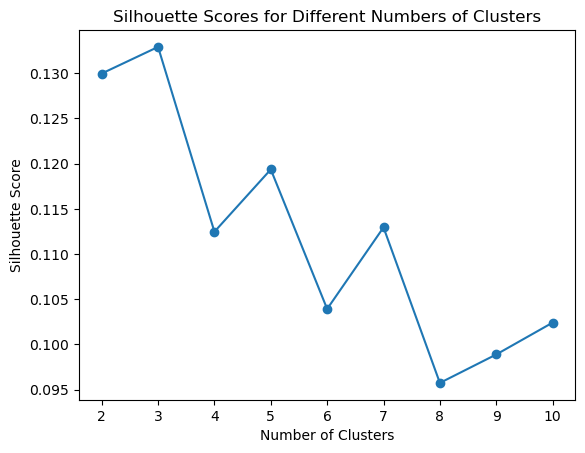

Cluster Centers:
[[ 5.74303952e-01  5.00286199e-01  2.11407667e+05  4.00586736e-01
   1.55624881e-02  5.16386837e+00  1.81662559e-01 -1.17977925e+01
   4.00843183e-02  1.15283536e+02  4.76870819e-01  1.56007388e+01
   6.42226326e+01  8.45080591e+01]
 [ 1.54187711e-01  6.53576634e-01  2.42173292e+05  7.00684211e-01
   2.36884676e-02  5.14941199e+00  1.71463152e-01 -7.78877733e+00
   6.31487951e-02  1.20178847e+02  6.80891961e-01  2.13915558e+01
   6.85569693e+01  8.98155003e+01]
 [ 3.41079209e-01  6.23148533e-01  2.39705117e+05  5.24079458e-01
   6.13815137e-02  5.16252822e+00  1.54023070e-01 -1.08364293e+01
   5.70888036e-02  1.15718883e+02  6.08612009e-01  7.95349887e+00
   2.42000000e+01  3.35115124e+01]
 [ 1.05936913e-01  5.78024703e-01  2.28283911e+05  7.78330589e-01
   1.17990648e-02  5.39737725e+00  2.24757731e-01 -5.82352272e+00
   9.13594694e-02  1.29943289e+02  5.69926014e-01  1.26776456e+01
   3.25959134e+01  4.60710582e+01]]
Inertia (within-cluster sum of squares): 143587.93

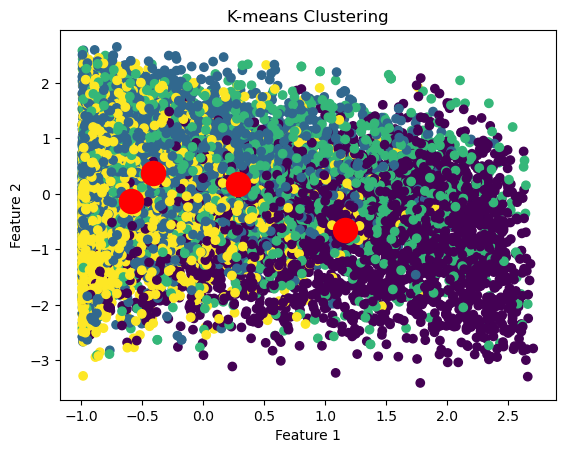

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to calculate and plot Silhouette Scores for different numbers of clusters
def plot_silhouette_scores(X, max_clusters):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")
    
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Scores for Different Numbers of Clusters")
    plt.show()

# Plot Silhouette Scores for 2 to 10 clusters
plot_silhouette_scores(X_scaled, 10)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  
kmeans.fit(X_scaled)

# Get clustering results
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Add clustering results to the original dataframe
test_df['cluster'] = labels

# Print the centers of each cluster
print("Cluster Centers:")
print(scaler.inverse_transform(cluster_centers))

# Calculate and print inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print(f"Inertia (within-cluster sum of squares): {inertia}")

# Calculate and print silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clustering results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-means Clustering")
plt.show()

